<h1><b>Electric Vehicle Sales Analysis</b></h1>
Analysis of global Electric Vehicle (EV) sales using Python.
This project explores EV market growth, BEV vs. PHEV adoption, and regional sales trends with visualizations to highlight key insights.

<h3><b>📌 Project Overview:</b></h3>
This project analyzes global EV sales data from 2010–2022 to explore market growth trends, compare BEV vs. PHEV adoption, and identify leading regions in EV adoption. Using Python with Pandas, NumPy, Matplotlib, and Seaborn, the dataset is cleaned, processed, and visualized to uncover meaningful patterns and insights.

<h3><b>Import and Inspect Data

In [41]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
#uploading the dataset
df = pd.read_csv("IEA-EV-dataEV salesCarsHistorical.csv")
#basic inspection of dataset
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   region      834 non-null    object
 1   category    834 non-null    object
 2   parameter   834 non-null    object
 3   mode        834 non-null    object
 4   powertrain  834 non-null    object
 5   year        834 non-null    int64 
 6   unit        834 non-null    object
 7   value       834 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 52.3+ KB


,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


<h3><b>Data Cleaning</b></h3>
Handle missing values

In [77]:
# Convert columns to numeric (in case of strings or floats)
df["year"] = pd.to_numeric(df["year"], errors="coerce").astype("Int64")
df["value"] = pd.to_numeric(df["value"], errors="coerce").astype("Int64")
regional_sales = df.groupby("region")["value"].sum().reset_index()
regional_sales = regional_sales.sort_values(by="value", ascending=False).head(10)
sales_per_year["YoY_Growth_%"] = sales_per_year["value"].pct_change() * 100
print(df.isnull().sum())

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64


<h3><b>Descriptive Analysis</b></h3>

In [75]:
df.describe()
#unique values

print("Unique Countries:", df["region"].nunique())
print("Unique Sales:", df["value"].nunique())
print("Unique Years:", df["year"].nunique())

#top countries

print(df['region'].value_counts().head(10))

#Total EV sales per year & per country
#Sales per Year
sales_per_year = df.groupby('year')['value'].sum().reset_index()
print("Sales Per Year")
print(sales_per_year)
#Sales Per Country
sales_per_country = df.groupby('region')['value'].sum().reset_index()
print("Sales Per Top 10 Countries")
print(sales_per_country.sort_values(by="value", ascending=False).head(10))
top_powertrains = df.groupby("powertrain")["value"].sum().reset_index()
top_powertrains = top_powertrains.sort_values(by="value", ascending=False).head(10)
print("Top EV Powertrains")
print(top_powertrains)

Unique Countries: 36
Unique Sales: 328
Unique Years: 13
region
World             26
Belgium           26
United Kingdom    26
China             26
EU27              26
Europe            26
Germany           25
USA               25
Spain             25
Poland            25
Name: count, dtype: int64
Sales Per Year
    year     value
0   2010     18574
1   2011    114463
2   2012    283006
3   2013    510321
4   2014    810547
5   2015   1411417
6   2016   1835620
7   2017   2815219
8   2018   4693645
9   2019   5148213
10  2020   8359524
11  2021  17036811
12  2022  24862183
Sales Per Top 10 Countries
            region     value
35           World  26984570
6            China  13675150
9           Europe   8134460
8             EU27   5945789
33             USA   3355000
12         Germany   2211480
34  United Kingdom   1134238
11          France   1054016
23          Norway    749420
30          Sweden    511344
Top EV Powertrains
  powertrain     value
0        BEV  45212037
1       P

<h3><b>Exploratory Data Analysis (EDA)</b></h3>

Here we go deeper into insights with visualizations

<h4><b>EV Market Growth 

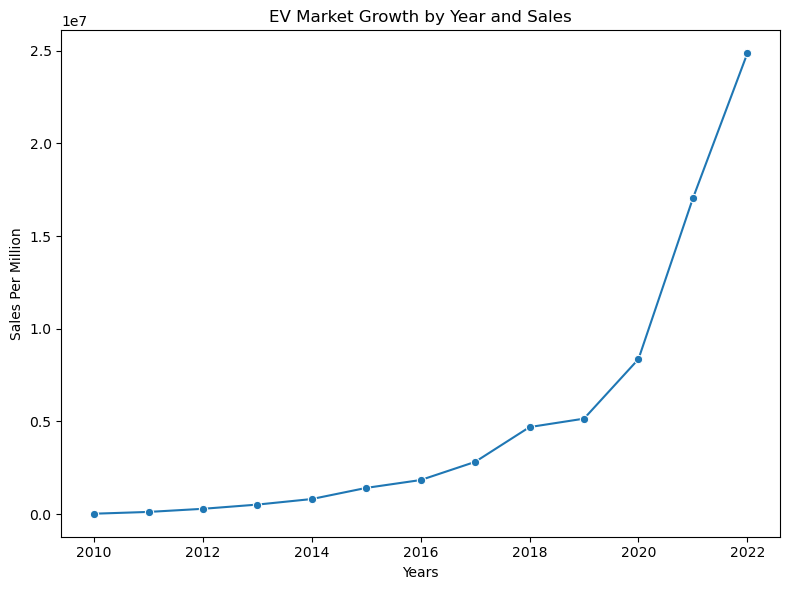

In [68]:
plt.figure(figsize=(8,6))
sns.lineplot(x="year", y="value", data=sales_per_year, marker='o')
plt.title('EV Market Growth by Year and Sales')
plt.xlabel('Years')
plt.ylabel('Sales Per Million')
plt.tight_layout()
plt.show()

<h4><b>Top EV Powertrain</h4>

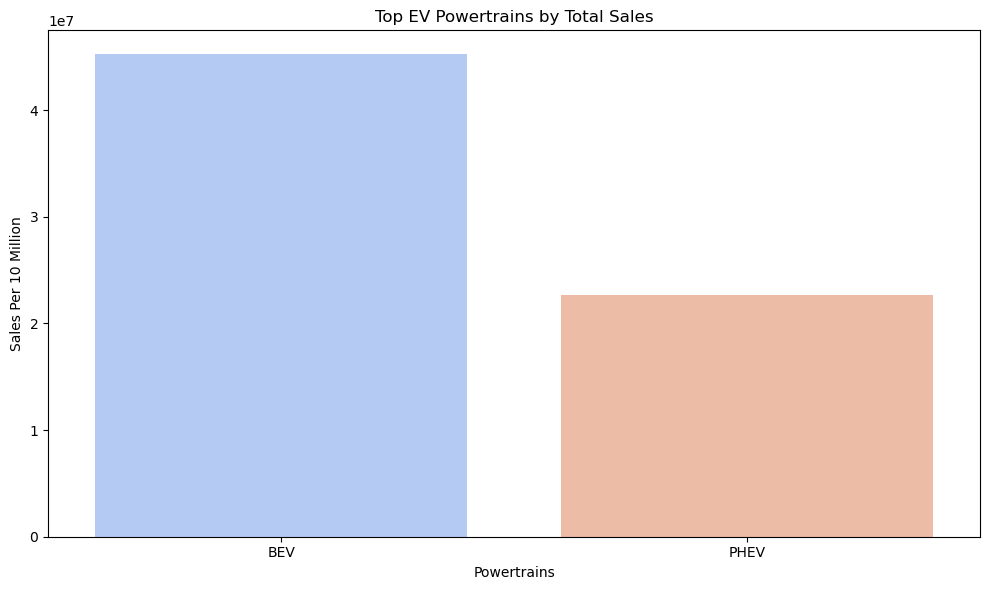

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(data=top_powertrains, x="powertrain", y="value", hue='powertrain', legend=False , palette="coolwarm")
plt.title("Top EV Powertrains by Total Sales")
plt.xlabel("Powertrains")
plt.ylabel("Sales Per 10 Million")
plt.tight_layout()
plt.show()

<h4><b>Regional Analysis</h4>

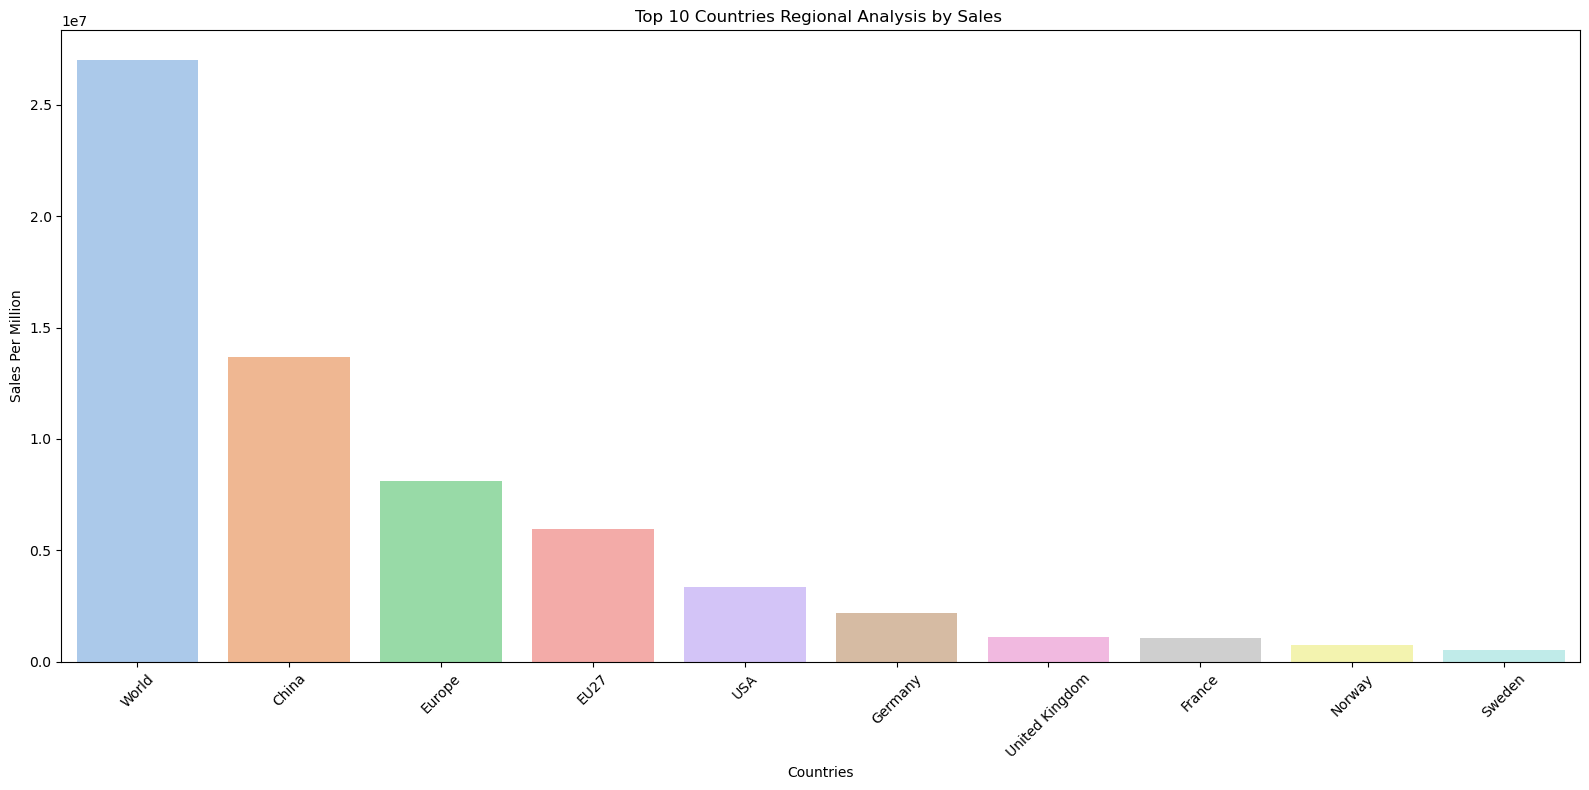

In [76]:
plt.figure(figsize=(16,8))
sns.barplot(data=regional_sales, x='region', y='value', hue='region', legend=False, palette='pastel')
plt.title('Top 10 Countries Regional Analysis by Sales ')
plt.xlabel('Countries')
plt.xticks(rotation=45)
plt.ylabel('Sales Per Million')
plt.tight_layout()
plt.show()

<h4><b>Year-on-Year Growth</h4>

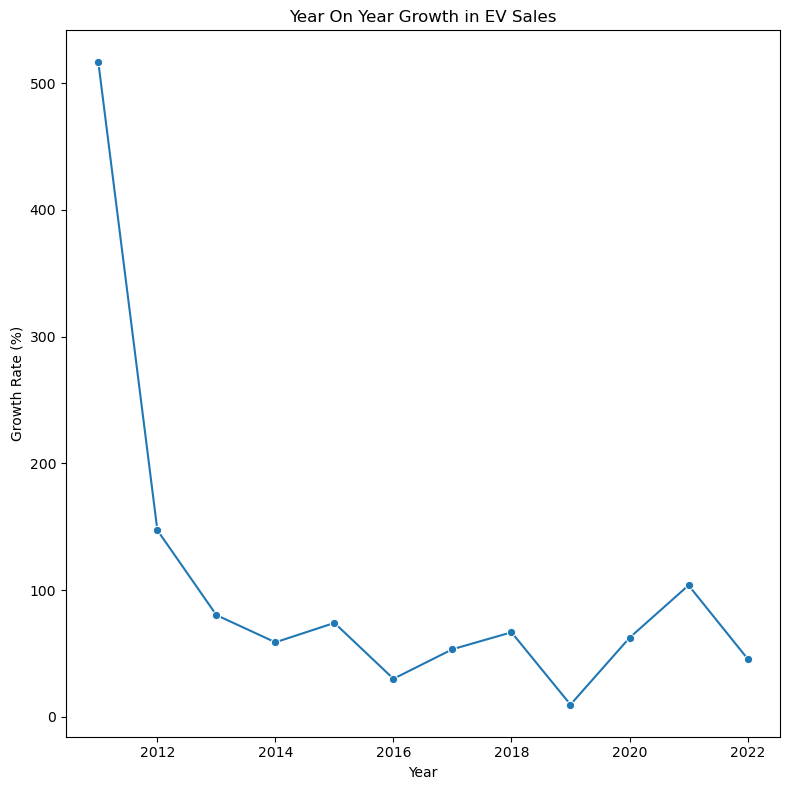

In [82]:
plt.figure(figsize=(8,8))
sns.lineplot(data=sales_per_year, x='year', y='YoY_Growth_%', marker='o')
plt.title('Year On Year Growth in EV Sales')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.tight_layout()
plt.show()

<h3><b>Key Insights</b></h3>
<ul>
<li>EV market sales have been climbing steadily year after year.

<li>BEVs (Battery Electric Vehicles) consistently outsell PHEVs (Plug-in Hybrid Electric Vehicles).

<li>China and Europe remain the two leading regions driving global EV adoption.

<ul><li>Year-on-year EV sales growth shows fluctuations:

<li>In 2011, sales growth spiked to nearly 500%.

<li>By the following year, growth dropped to around 150%.

<li>In 2021, growth surged again above 100%, but fell in the next year.</ul>

<li>These sharp changes suggest that while the overall trend is upward, market growth can be influenced by policy changes, subsidies, supply chain issues, and consumer adoption cycles.</ul>